# Exercise 3

Generate simulated values from the following distributions
* 1 Exponential Distribution 

In [27]:
import numpy as np

In [28]:
N = 10000

In [29]:
# Exponential distribution
def exp_dist_samp(N, lam):
    U = np.random.rand(N)
    return -np.log(1 - U) / lam

In [30]:
X = exp_dist_samp(N, 1)
print(X)

[2.5515097  2.17788229 1.09850504 ... 0.27003448 0.77278881 0.80303363]


In [31]:
def stand_norm_dist_samp(N):
    i = 0
    X = np.zeros(N)
    while i < N//2:
        V1,V2 = 2*np.random.rand(2) -1
        R2 = V1**2 + V2**2
        if R2 > 1:
            continue
        cos2piu2 = V1/np.sqrt(R2)
        sin2piu2 = V2/np.sqrt(R2)
        U = np.random.rand()
        quantity = np.sqrt(-2*np.log(U))
        
        X[i] = quantity * cos2piu2
        X[-i] = quantity * sin2piu2
        i+= 1
    return X
    

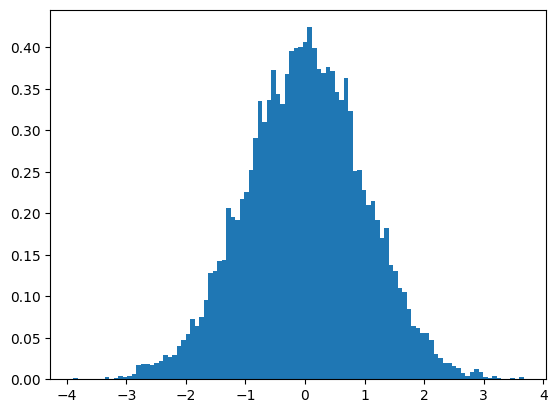

In [32]:
X_normal = stand_norm_dist_samp(N)
#plot histogram
import matplotlib.pyplot as plt
plt.hist(X_normal, bins=100, density=True)
plt.show()


In [33]:
from tests import do_all_tests
results = do_all_tests(X)

KS test: D = 1.0 p-value = 1.0
Chi-square test: test = 2025.8 p-value = 0.0
Run test 1: test = 5000 p-value = 0.5079787126492114
Run test 2: test = 8.328217615880732 p-value = 0.215029776983225
Run test 3: test = 0.06325128561089476 p-value = 0.9495664064909279
Correlation coefficient: c = 1.0531191944740796 p-value = 0.0


### Pareto distribution

In [34]:
def pareto_dist_samp(N, beta, k):
    U = np.random.rand(N)
    return beta / (U**(1/k))

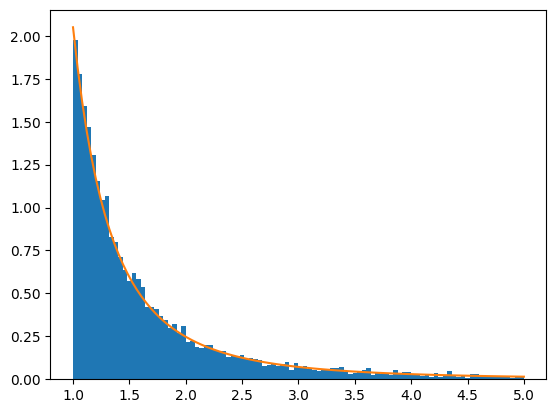

In [35]:
beta = 1
k = 2.05
#plot histogram
X_pareto = pareto_dist_samp(N, beta, k)
_ = plt.hist(X_pareto, bins=100, density=True, range=(1,5))
#plot the theoretical distribution
x = np.linspace(1,5,100)
y = k * beta**k / x**(k+1) #probability density function
plt.plot(x,y)
plt.show()

In [36]:
results= do_all_tests(X_pareto)

KS test: D = 1.0 p-value = 1.0
Chi-square test: test = 10000.0 p-value = 0.0
Run test 1: test = 4952 p-value = 0.8364690361636442
Run test 2: test = 14.675711191391581 p-value = 0.022934596478199287
Run test 3: test = -0.695764141719756 p-value = 0.4865765490457181
Correlation coefficient: c = 3.7038438066448447 p-value = 0.0


In [37]:
#Difference between theoretical and empirical mean
print("Theoretical mean: ", beta*k/(k-1))
print("Empirical mean: ", np.mean(X_pareto))

#Difference between theoretical and empirical variance
print("Theoretical variance: ", beta**2 * k / ((k-1)**2 * (k-2)))
print("Empirical variance: ", np.var(X_pareto))

Theoretical mean:  1.9523809523809526
Empirical mean:  1.9499348532117917
Theoretical variance:  37.18820861678019
Empirical variance:  17.54156962970998


3) For the normal distribution generate 100 95% confidence
intervals for the mean and variance, each based on 10 observations. Discuss the results.

In [42]:
#For the normal distribution generate 100 95% confidence
#intervals for the mean and variance, each based on 10 observations. Discuss the results.
means = np.zeros(100)
variances = np.zeros(100)
for i in range(100):
    X = stand_norm_dist_samp(10)
    mean = np.mean(X)
    variance = np.var(X)
    means[i] = mean
    variances[i] = variance
#95% confidence interval for the mean
mean_confidence_interval = np.percentile(means, [2.5, 97.5])
print("95% confidence interval for the mean: ", mean_confidence_interval)
#95% confidence interval for the variance
variance_confidence_interval = np.percentile(variances, [2.5, 97.5])
print("95% confidence interval for the variance: ", variance_confidence_interval)


95% confidence interval for the mean:  [-0.46256507  0.61776879]
95% confidence interval for the variance:  [0.22182184 1.6938665 ]


4. Simulate from the Pareto distribution using composition

In [ ]:
def pareto_comp_sample(N, beta, k):
    Y= exp_dist_samp(N, beta)